# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "33018c2bbd554247ef271b945a42450a46bd6b8f"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O options_strangle.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_strangle/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' options_strangle.py

In [5]:
from options_strangle import OptionsStrangle as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130279,
 'strategyId': '4198114a6c114189ade40a20de73a434'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NIFTY BANK', exchange='NSE')
instrument

[{'id': 5669, 'value': 'NSE:NIFTY BANK'}]

## Setup Parameters

In [9]:
parameters = {
    'LEG_ONE_NUMBER_OF_STRIKES': 2,
    'LEG_ONE_STRIKE_DIRECTION': 2,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_ONE_TRANSACTION_TYPE': 2,
    
    
    'LEG_TWO_NUMBER_OF_STRIKES': 2,
    'LEG_TWO_STRIKE_DIRECTION': 2,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_TWO_TRANSACTION_TYPE': 2
}

In [10]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:NIFTY 50', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Strangle Template' in BACKTESTING mode...
╒═════════════════════════╤══════════════════════════════════════╕
│ Config                  │ Value                                │
╞═════════════════════════╪══════════════════════════════════════╡
│ Strategy Name           │ Options Strangle Template            │
├─────────────────────────┼──────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                          │
├─────────────────────────┼──────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY 50']                     │
├─────────────────────────┼──────────────────────────────────────┤
│ Quantity/Lots           │ 10                                   │
├─────────────────────────┼──────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30            │
├─────────────────────────┼──────────────────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30  

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

In [15]:
print(logs)

[2023-08-24 20:03:52] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-24 20:03:53] Sanity checks on cfg successful.
[2023-08-24 20:03:53] Currency set to "INR"
[2023-08-24 20:03:53] Setting up broker connection...
[2023-08-24 20:03:54] Broker connection has been setup successfully.
[2023-08-24 20:03:54] (NSE_IDX) Funds available in client's ABVIRTUALBROKER account is : INR '1450000.00'
[2023-08-24 20:03:54] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-24 20:03:54] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-24 20:03:54] Reading strategy...
[2023-08-24 20:03:54] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NFO      NIFTY05AUG2115850PE 2021-08-01 09:15:00+05:30   
1                  NFO      NIFTY05AUG2115850CE 2021-08-01 09:15:00+05:30   
2                  NFO      NIFTY05AUG2115950PE 2021-08-02 09:15:00+05:30   
3                  NFO      NIFTY05AUG2115950CE 2021-08-02 09:15:00+05:30   
4                  NFO      NIFTY05AUG2116050PE 2021-08-03 09:15:00+05:30   
..                 ...                      ...                       ...   
971                NFO      NIFTY27JUL2319950CE 2023-07-27 09:15:00+05:30   
972                NFO      NIFTY03AUG2319750PE 2023-07-28 09:15:00+05:30   
973                NFO      NIFTY03AUG2319750CE 2023-07-28 09:15:00+05:30   
974                NFO      NIFTY03AUG2319750PE 2023-07-31 09:15:00+05:30   
975                NFO      NIFTY03AUG2319750CE 2023-07-31 09:15:00+05:30   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                     SELL             500              ₹       127.45   
1                     SELL             500              ₹        40.50   
2                     SELL             500              ₹       154.95   
3                     SELL             500              ₹        28.00   
4                     SELL             500              ₹       166.95   
..                     ...             ...            ...          ...   
971                   SELL             500              ₹        12.00   
972                   SELL             500              ₹       120.95   
973                   SELL             500              ₹       100.00   
974                   SELL             500              ₹       138.90   
975                   SELL             500              ₹        59.55   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2021-08-01 15:30:00+05:30                   BUY            500   
1   2021-08-01 15:30:00+05:30                   BUY            500   
2   2021-08-02 15:30:00+05:30                   BUY            500   
3   2021-08-02 15:30:00+05:30                   BUY            500   
4   2021-08-03 15:30:00+05:30                   BUY            500   
..                        ...                   ...            ...   
971 2023-07-27 15:30:00+05:30                   BUY            500   
972 2023-07-28 15:30:00+05:30                   BUY            500   
973 2023-07-28 15:30:00+05:30                   BUY            500   
974 2023-07-31 15:30:00+05:30                   BUY            500   
975 2023-07-31 15:30:00+05:30                   BUY            500   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               ₹      127.45           0.0                      0.0  
1               ₹       40.50           0.0                      0.0  
2               ₹      104.80       25075.0                  25075.0  
3               ₹       33.60       -2800.0                  22275.0  
4               ₹       43.45       61750.0                  84025.0  
..            ...         ...           ...                      ...  
971             ₹        0.10        5950.0                1476125.0  
972             ₹      138.90       -8975.0                1467150.0  
973             ₹       59.55       20225.0                1487375.0  
974             ₹      138.90           0.0                1487375.0  
975             ₹       59.55           0.0                1487375.0  

[976 rows x 14 columns]

### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-01
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   102.58%
CAGR﹪              42.4%

Sharpe              1.16
Prob. Sharpe Ratio  94.3%
Sortino             1.61
Sortino/√2          1.14
Omega               1.21

Max Drawdown        -26.78%
Longest DD Days     154

Gain/Pain Ratio     0.21
Gain/Pain (1M)      2.26

Payoff Ratio        0.98
Profit Factor       1.21
Common Sense Ratio  1.06
CPC Index           0.66
Tail Ratio          0.88
Outlier Win Ratio   3.18
Outlier Loss Ratio  3.53

MTD                 6.21%
3M                  10.06%
6M                  20.4%
YTD                 14.37%
1Y                  25.17%
3Y (ann.)           42.4%
5Y (ann.)           42.4%
10Y (ann.)          42.4%
All-time (ann.)     42.4%

Avg. Drawdown       -4.04%
Avg. Drawdown Days  21
Recovery Factor     3.83
Ulcer Index         0.09
Serenity Index      1.48


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-01
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          102.58%
CAGR﹪                     42.4%

Sharpe                     1.16
Prob. Sharpe Ratio         94.3%
Smart Sharpe               0.9
Sortino                    1.61
Smart Sortino              1.25
Sortino/√2                 1.14
Smart Sortino/√2           0.89
Omega                      1.21

Max Drawdown               -26.78%
Longest DD Days            154
Volatility (ann.)          37.57%
Calmar                     1.58
Skew                       -0.56
Kurtosis                   1.41

Expected Daily %           0.14%
Expected Monthly %         2.99%
Expected Yearly %          26.53%
Kelly Criterion            9.73%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.72%
Expected Shortfall (cVaR)  -3.72%

Max Consecutive Wins      

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-10-19  2021-12-20  2022-03-22   154    -26.783361        -24.010183
2  2022-04-05  2022-06-22  2022-08-12   129    -23.272735        -23.185343
3  2022-12-14  2023-03-15  2023-05-04   141    -15.362136        -14.586815
4  2022-09-15  2022-10-11  2022-11-22    68     -9.266729         -8.845076
5  2023-05-16  2023-05-18  2023-07-03    48     -5.199697         -4.515716

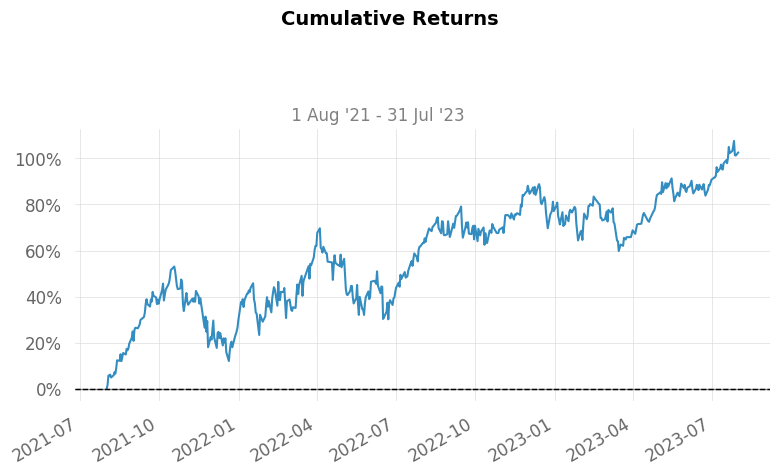

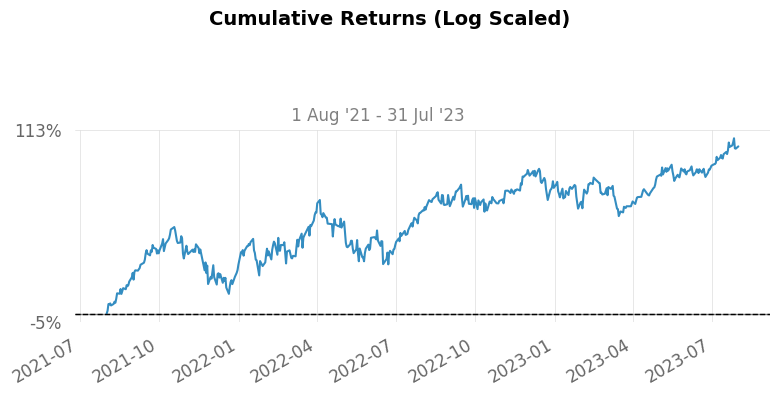

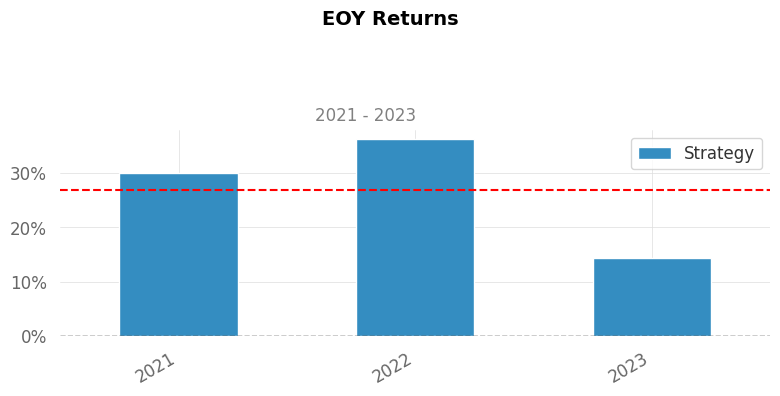

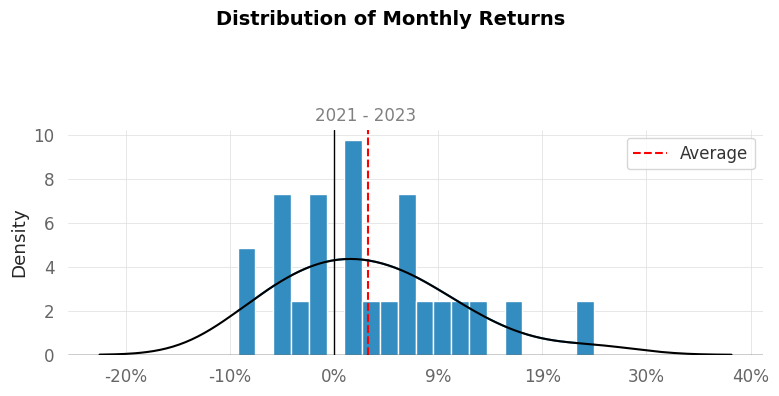

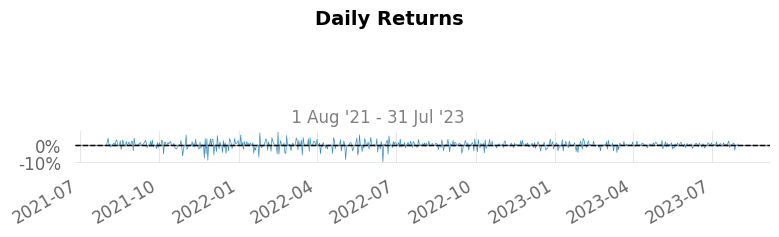

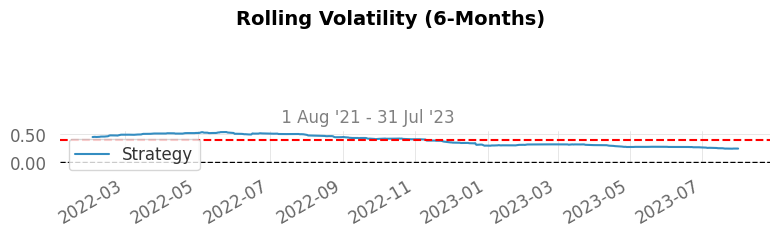

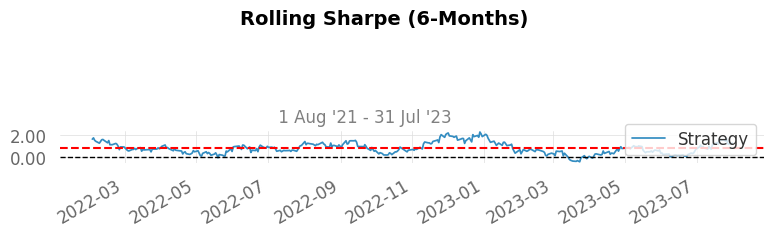

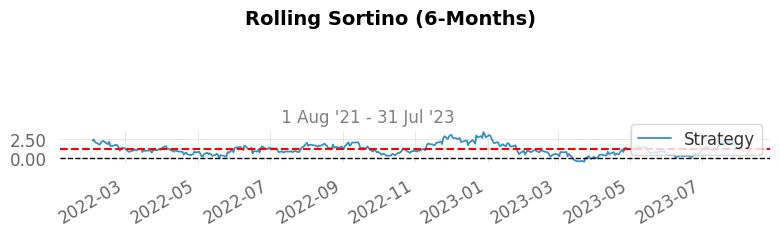

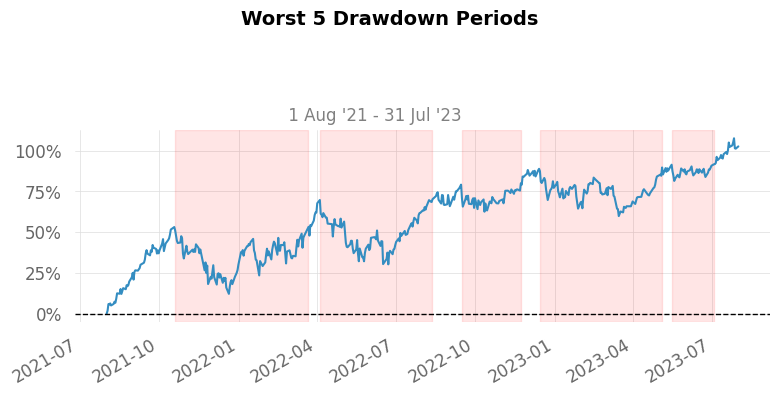

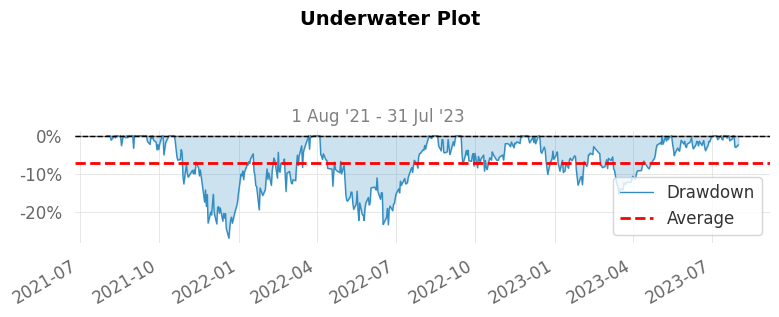

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


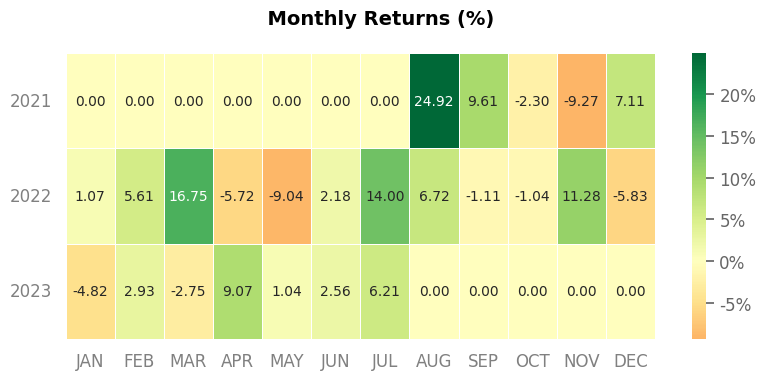

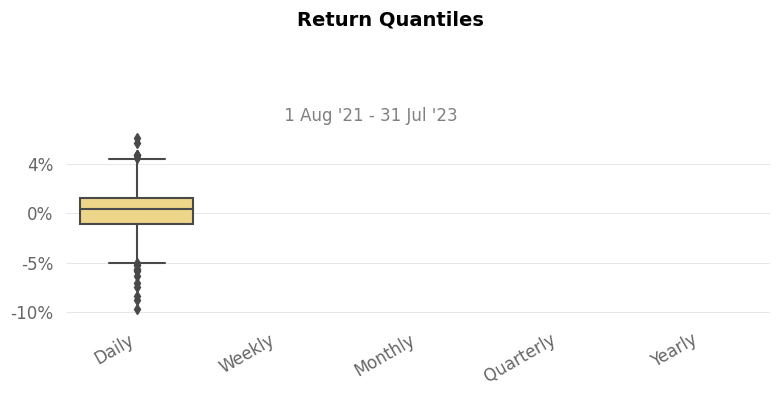

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+------------------------------------+---------------------------+----------------------------------+------+
| INST                               | TIME                      | ID                               | TT   |
|------------------------------------+---------------------------+----------------------------------+------|
| NSE_FO:NIFTY05AUG2115850CE [LOCAL] | 2021-08-01 09:15:00+05:30 | 6860a5dcc1d94ccb9c4efd5285d1bbd6 | SELL |
+------------------------------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-01 09:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-01 09:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-01 09:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-01 09:15:00+05:30 | OPEN      

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)